In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import iradon
from PIL import Image

In [2]:
#Archivo que vamos a leer:
dat='botella3.dat'

In [3]:
#Leemos la cabecera y anotamos:
head=np.fromfile(dat,dtype='float64',count=7)
print('canales=', head[0])
print('proyecciones=', head[1])
print('cortes=', head[2])
print('tamaño pixel=', head[3])
print('paso entre cortes=', head[4])
print('distancia foco-objeto=', head[5])
print('distancia foco-detector=', head[6])
canales =head[0]; proyecciones=head[1]; cortes=head[2];pixel=head[3]
paso=head[4];sod=head[5];sid=head[6]

canales= 498.0
proyecciones= 725.0
cortes= 5.0
tamaño pixel= 0.8
paso entre cortes= 50.0
distancia foco-objeto= 338.8
distancia foco-detector= 1180.4


In [4]:
#Leemos el archivo de datos, sin la cabecera:
file=np.fromfile(dat,np.float64)[7:]

In [5]:
#EL valor real del numero de canales es erroneo, el real es:
canales=558

In [6]:
#El primer corte va hasta el 724 (nos falta una proyección)
#La longitud de la primera proyeccion es 724, no 725, debido a un fallo en el programa del laboratorio:

cortes=np.reshape(file,(len(file)//558,558)) #Reshapeamos la imagen
cortes=-np.log10(np.abs(cortes/max(cortes.flatten())))

#Seleccionamos los 5 cortes:

corte1=cortes[0:724,:]
corte2=cortes[724:2*725-1,:]
corte3=cortes[2*725-1:3*725-1,:]
corte4=cortes[725*3-1:725*4-1,:]
corte5=cortes[725*4-1:725*5-1,:]


cortes=[corte1,corte2,corte3,corte4,corte5]



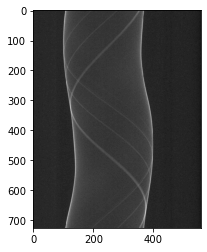

In [7]:
#Guardamos un sinograma:
plt.imshow(cortes[1],cmap='gray')
plt.savefig('corte.eps')

In [8]:
#Pasamos a array y los transponemos para la funcion iradon:
for i in range(len(cortes)):
    cortes[i]=np.array(cortes[i]).T


In [58]:
#Obtenemos el ct mediante la imagen del iradon:
theta1=np.linspace(0,359.5,724)#angulos del primer corte que tiene una proyeccion menos
theta=np.linspace(0,360,725) #angulos del resto
ct=[]
ct.append(iradon(cortes[0], theta1, filter_name='shepp-logan', interpolation='linear'))
for i in range(1,5):
    ct.append(iradon(cortes[i][:-59], theta, filter_name='shepp-logan', interpolation='linear'))
    
#se ha recortado los ultimos 59 puntos del sinograma para poder centrarlo, dado que la botella estaba descentrada en el eje
#se sigue apreciando un desplazamiento pero es lo máximo  que podemos ajustar (cada dato quitado sonn 0,8mm, no podemos ajustar más)

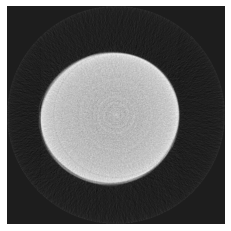

In [65]:
#guardamos el corte:
plt.imshow(ct[4],cmap='gray')
plt.axis('off')
plt.savefig('ct5.eps')

In [29]:
#Reconstrucción del lego
#Leemos la cabecera:
head=np.fromfile('click_03.dat',dtype='float64',count=7)
print('canales= ', head[0])
print('proyecciones= ', head[1])
print('cortes=', head[2])
print('tamaño pixel=', head[3])
print('paso entre cortes=', head[4])
print('distancia foco-objeto=', head[5])
print('distancia foco-detector=', head[6])
canales =round(head[0]); proyecciones=round(head[1]); cortes=round(head[2]);pixel=head[3]
paso=head[4];sod=head[5];sid=head[6]

canales=  498.0
proyecciones=  725.0
cortes= 143.0
tamaño pixel= 0.8
paso entre cortes= 0.5
distancia foco-objeto= 338.8
distancia foco-detector= 1180.4


In [30]:
#Leemos el archivo de datos, sin la cabecera y le damos la forma de matriz:
file=np.fromfile('click_03.dat',np.float64)[7:]
file_sec=np.reshape(file,(len(file)//canales,canales))
file_sec.shape

(103675, 498)

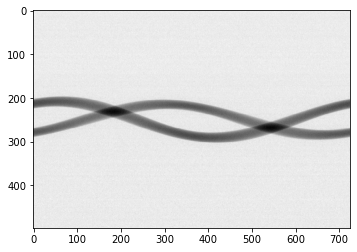

In [31]:
#Separamos los cortes y los metemos en una lista:

cortes_ct=[]

for i in range(round(cortes)):
        cortes_ct.append(file_sec[round(i*proyecciones) : round((i+1)*proyecciones),:])
        cortes_ct[i]=np.array(cortes_ct[i]).T
plt.imshow(cortes_ct[130],cmap='gray')

In [10]:
import scipy.misc
#creamos un bucle para que guarde todos los sinogramas:
image_no=1
for i in range(cortes):
    name = 'sinograms/csinogram_' + str(image_no) + '.png'
    data=cortes_ct[i]

    rescaled = (255.0 / data.max() * (data - data.min())).astype(np.uint8) #cambiamos la lookuptable para guardarlo

    im = Image.fromarray(rescaled)
    im.save(name)
    image_no += 1
    
    

In [7]:
#Reconstruimos todos los slices mediante iradon:
ct_lego=[]
theta=np.linspace(0,360,proyecciones) 
for i in range(cortes):
    ct_lego.append(iradon(cortes_ct[i], theta, filter_name='shepp-logan', interpolation='linear'))
    if i%10==0:
        print('imagen:', i) #contador para ver el progreso

imagen: 0
imagen: 10
imagen: 20
imagen: 30
imagen: 40
imagen: 50
imagen: 60
imagen: 70
imagen: 80
imagen: 90
imagen: 100
imagen: 110
imagen: 120
imagen: 130
imagen: 140


In [56]:
import scipy.misc
#Creamos otro bucle para guardar todos los cortes

image_no=1

for i in range(cortes):
    name = 'ct/ct_' + str(image_no) + '.png'
    data=ct_lego[i]

    rescaled = (255.0 / data.max() * (data - data.min())).astype(np.uint8) #cambiamos la lookuptable para guardarlo

    im = Image.fromarray(rescaled)
    im.save(name)
    image_no += 1
    
    


(498, 498)

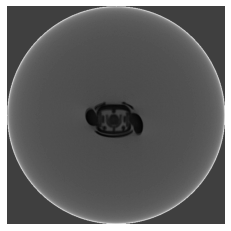

In [22]:
#enseñamos un corte de ejemplo:
plt.imshow(ct_lego[50],cmap='gray')
plt.axis('off')
ct_lego[0].shape

